## Group Project Proposal
# An Exploratory Analysis Into Diabetes
#### Group 21: Aiko Sumarno, Yoona Wang, Jerry Jin, Daniel Chou

## Introduction:

### Preliminary Exploratory Data Analysis:

In [118]:
library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
options(repr.matrix.max.rows = 10)

In [119]:
set.seed(123)

### 1. Read and Tidy Data

The data we have used was taken from [Kaggle](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset) and it is a dataset of medical and demographic data of people who may or may not have diabetes. The primary source of this dataset are Electronic Health records by healthcare providers. The dataset contains the following variables: 

* gender = Male or Female
* age = How old is the person?
* hypertension = Does the person have hypertension? (1 - yes, 0 - no)
* heart_disease = Does the person have heart disease? (1 - yes, 0 - no)
* smoking_istory = Is the person a smoker? (never, no info, current, former, ever, never, and not current)
* bmi = body mass index
* HbA1c_level = Hemoglobin A1C, average blood sugar level  over the past two to three months
* blood_glucose_level = amount of glucose in the person's blood
* diabetes = Does the person have diabetes or not? (1 - yes, 0 - no)

For our analysis, we have decided to use the person's **age**, **bmi**, **HbA1c_level**, **blood_glucose_level** and **diabetes** variables only. 

In [120]:
diabetes <- read_csv("data/diabetes.csv")
head(diabetes)

Rows: 100000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gender, smoking_history
dbl (7): age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_l...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Female,80,0,1,never,25.19,6.6,140,0
Female,54,0,0,No Info,27.32,6.6,80,0
Male,28,0,0,never,27.32,5.7,158,0
Female,36,0,0,current,23.45,5.0,155,0
Male,76,1,1,current,20.14,4.8,155,0
Female,20,0,0,never,27.32,6.6,85,0


In [121]:
diabetes <- diabetes |>
              mutate(diabetes = as_factor(diabetes)) |>
              mutate(diabetes = fct_recode(diabetes, "diabetic" = "1", "non-diabetic" = "0")) |> 
              mutate(hypertension = as_factor(hypertension)) |> 
              mutate(hypertension = fct_recode(hypertension, "yes" = "1", "no" = "0")) |> 
              mutate(heart_disease = as_factor(heart_disease)) |> 
              mutate(heart_disease = fct_recode(heart_disease, "yes" = "1", "no" = "0"))
head(diabetes)

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
<chr>,<dbl>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
Female,80,no,yes,never,25.19,6.6,140,non-diabetic
Female,54,no,no,No Info,27.32,6.6,80,non-diabetic
Male,28,no,no,never,27.32,5.7,158,non-diabetic
Female,36,no,no,current,23.45,5.0,155,non-diabetic
Male,76,yes,yes,current,20.14,4.8,155,non-diabetic
Female,20,no,no,never,27.32,6.6,85,non-diabetic


In [122]:
diabetes_tidy <- diabetes |> 
                    select(-gender, - hypertension, -heart_disease, -smoking_history)
head(diabetes_tidy)

age,bmi,HbA1c_level,blood_glucose_level,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
80,25.19,6.6,140,non-diabetic
54,27.32,6.6,80,non-diabetic
28,27.32,5.7,158,non-diabetic
36,23.45,5.0,155,non-diabetic
76,20.14,4.8,155,non-diabetic
20,27.32,6.6,85,non-diabetic


### 2. Summarize Data 

We decided to split **75%** of the data **for training** and **25% for testing**. 

To summarize the training data, we counted the number and percentage of patients that were diagnosed with diabetes and the ones that were not. We also calculated the average value of each predictor variables and compared the average values between diabetic and non-diabetic patients. 

In [123]:
diabetes_split <- initial_split(diabetes_tidy, prop = 0.75, strata = diabetes) 
diabetes_training <- training(diabetes_split)
diabetes_testing <- testing(diabetes_split)

In [124]:
glimpse(diabetes_training)

Rows: 75,000
Columns: 5
$ age                 <dbl> 80, 76, 44, 79, 32, 54, 78, 67, 76, 78, 15, 42, 37…
$ bmi                 <dbl> 25.19, 20.14, 19.31, 23.86, 27.32, 54.70, 36.05, 2…
$ HbA1c_level         <dbl> 6.6, 4.8, 6.5, 5.7, 5.0, 6.0, 5.0, 5.8, 5.0, 6.6, …
$ blood_glucose_level <dbl> 140, 155, 200, 85, 100, 100, 130, 200, 160, 126, 2…
$ diabetes            <fct> non-diabetic, non-diabetic, diabetic, non-diabetic…


In [125]:
glimpse(diabetes_testing)

Rows: 25,000
Columns: 5
$ age                 <dbl> 54, 28, 36, 20, 42, 53, 42, 72, 4, 30, 67, 50, 34,…
$ bmi                 <dbl> 27.32, 27.32, 23.45, 27.32, 33.64, 27.32, 27.32, 2…
$ HbA1c_level         <dbl> 6.6, 5.7, 5.0, 6.6, 4.8, 6.1, 5.7, 6.5, 4.0, 6.1, …
$ blood_glucose_level <dbl> 80, 158, 155, 85, 145, 85, 80, 130, 140, 126, 200,…
$ diabetes            <fct> non-diabetic, non-diabetic, non-diabetic, non-diab…


In [126]:
cat("Table 1: Number and Percentage of Patients that Diagnosed with Diabetes\n")
diabetes_proportions <- diabetes_training |>
                          group_by(diabetes) |>
                          summarize(count = n()) |>
                          mutate(percent = 100*count/nrow(diabetes_training))

diabetes_proportions

Table 1: Number and Percentage of Patients that Diagnosed with Diabetes


diabetes,count,percent
<fct>,<int>,<dbl>
non-diabetic,68613,91.484
diabetic,6387,8.516


In [127]:
cat("Table 2: Average Predictor Values\n")
diabetes_mean <- diabetes_training |>
                    select(-diabetes) |>
                    map_df(mean) 
diabetes_mean

Table 2: Average Predictor Values


age,bmi,HbA1c_level,blood_glucose_level
<dbl>,<dbl>,<dbl>,<dbl>
41.87175,27.30872,5.526589,138.0455


In [128]:
cat("Table 3: Average Predictor Values for Diabetic and Non-Diabetic Patients")
comparison <- diabetes_training |>
                group_by(diabetes) |>
                summarize(avg_age = mean(age),
                          avg_bmi = mean(bmi), 
                          avg_HbA1c_level = mean(HbA1c_level), 
                          avg_blood_glucose_level = mean(blood_glucose_level))
comparison

Table 3: Average Predictor Values for Diabetic and Non-Diabetic Patients

diabetes,avg_age,avg_bmi,avg_HbA1c_level,avg_blood_glucose_level
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
non-diabetic,40.09991,26.87615,5.395717,132.8445
diabetic,60.90590,31.95565,6.932504,193.9172


### 3. Exploratory Data Visualization

Histograms are used to visualize and the distribution of each of the predictor variables between diabetic and non-diabetic patients we plan to use in our analysis. 

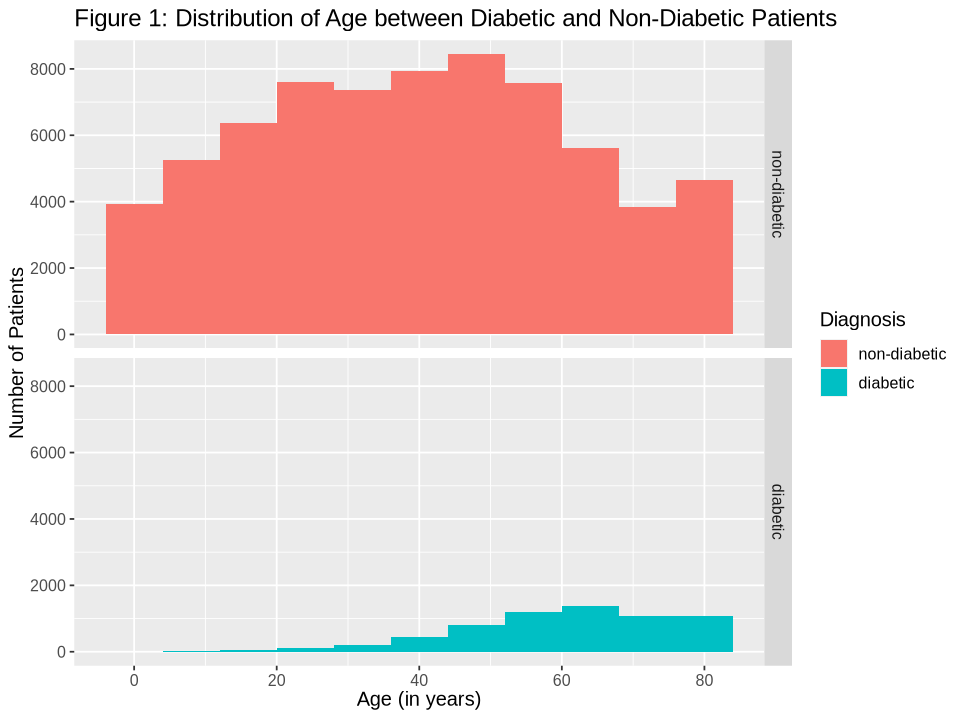

In [129]:
options(repr.plot.width = 8, repr.plot.height = 6)
age_plot <- diabetes_training |>
                ggplot(aes(x = age, fill = diabetes)) +
                geom_histogram(binwidth = 8) +
                facet_grid(rows = vars(diabetes)) +
                labs(x = "Age (in years)", y = "Number of Patients", fill = "Diagnosis") +
                ggtitle("Figure 1: Distribution of Age between Diabetic and Non-Diabetic Patients") +
                theme(text = element_text(size = 12))
age_plot

From Figure 1, Non-diabetic patients (upper bars) appear to have a reasonably consistent distribution over the age range, with a slight decrease in the oldest age group. For diabetes patients (lower bars), the numbers begin low for the youngest age groups, rise and peak in the middle age ranges, and then fall for the older age groups.

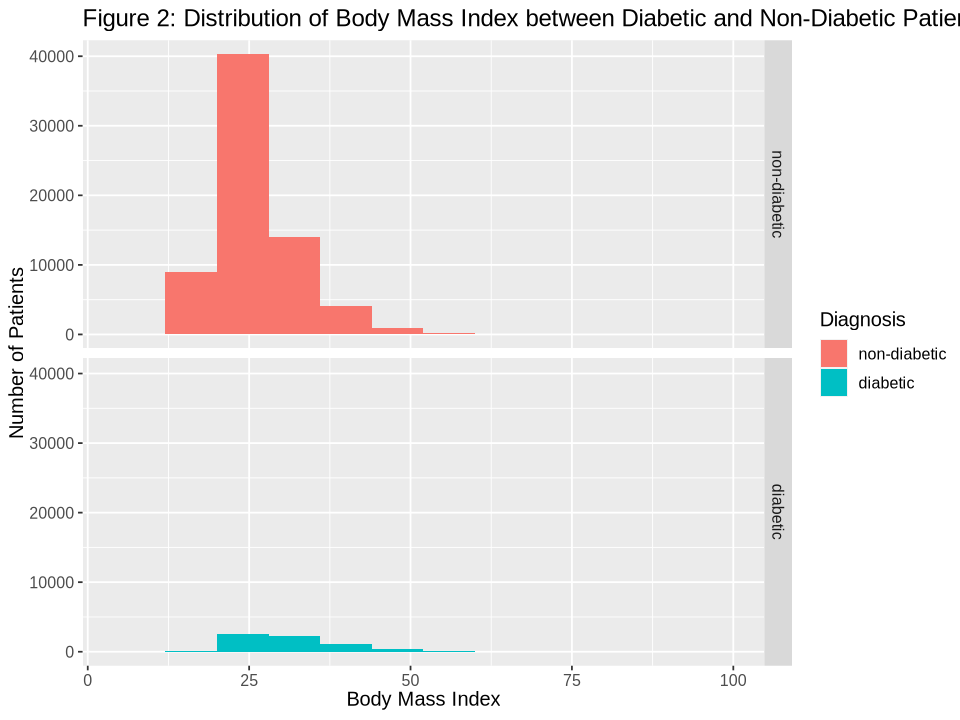

In [130]:
bmi_plot <- diabetes_training |>
                ggplot(aes(x = bmi, fill = diabetes)) +
                geom_histogram(binwidth = 8) +
                facet_grid(rows = vars(diabetes)) +
                labs(x = "Body Mass Index", y = "Number of Patients", fill = "Diagnosis") +
                ggtitle("Figure 2: Distribution of Body Mass Index between Diabetic and Non-Diabetic Patients") +
                theme(text = element_text(size = 12))
bmi_plot

From Figure 2, for non-diabetic patients, there is a significant peak in the lower BMI range, indicating a larger concentration of non-diabetic persons with this BMI.
On the other hand, when an individual has a BMI under 20 kg/m^2, there is very little change to be diabetic.
Based on the trend of the graph, the higher the BMI, the bigger chance of being diabetic.

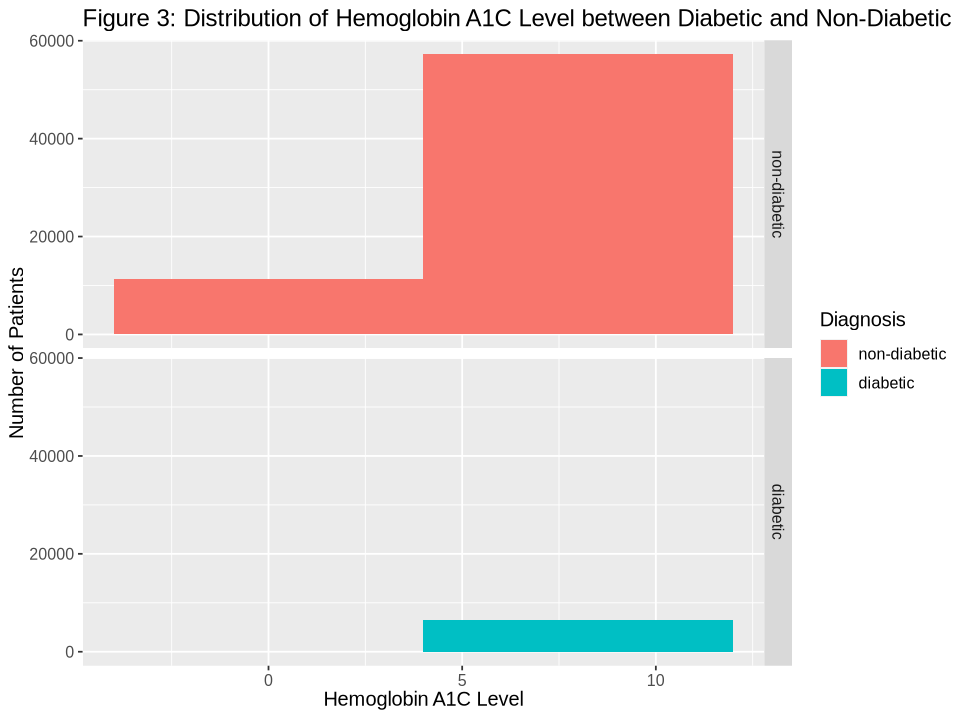

In [131]:
HbA1c_level_plot <- diabetes_training |>
                        ggplot(aes(x = HbA1c_level, fill = diabetes)) +
                        geom_histogram(binwidth = 8) +
                        facet_grid(rows = vars(diabetes)) +
                        labs(x = "Hemoglobin A1C Level", y = "Number of Patients", fill = "Diagnosis") +
                        ggtitle("Figure 3: Distribution of Hemoglobin A1C Level between Diabetic and Non-Diabetic Patients") +
                        theme(text = element_text(size = 12))
HbA1c_level_plot

The x-axis shows hemoglobin A1C levels, which are an essential measure in diabetes care since they indicate average blood glucose levels over the previous three months. According to the graph, only people with ~4% hemoglobin A1C levels or higher are possible to be diabetic. 

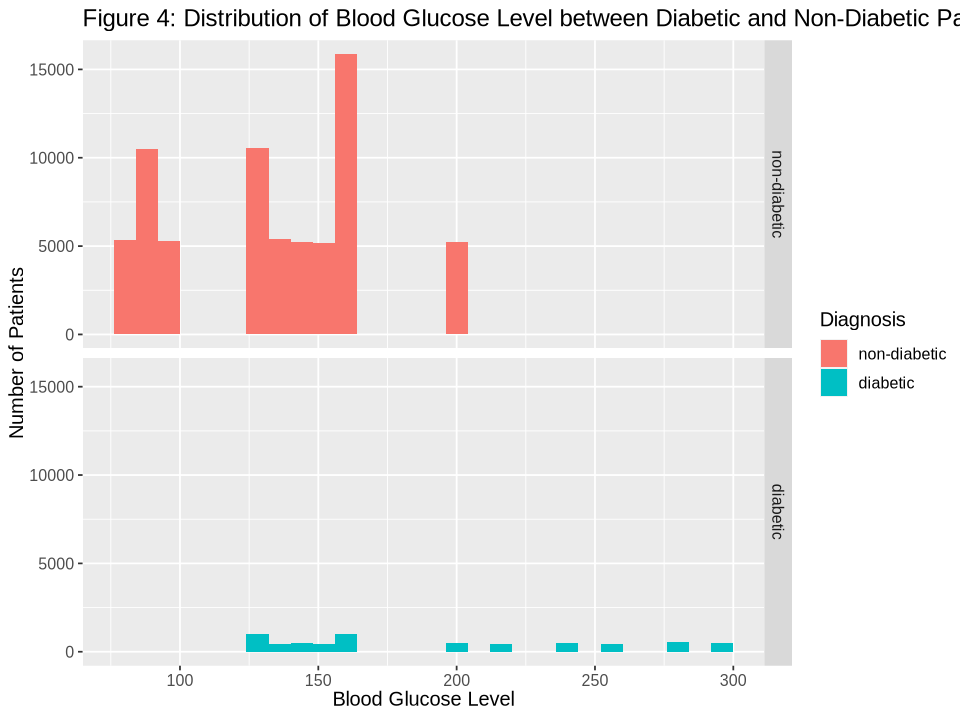

In [132]:
blood_glucose_level_plot <- diabetes_training |>
                            ggplot(aes(x = blood_glucose_level, fill = diabetes)) +
                            geom_histogram(binwidth = 8) +
                            facet_grid(rows = vars(diabetes)) +
                            labs(x = "Blood Glucose Level", y = "Number of Patients", fill = "Diagnosis") +
                            ggtitle("Figure 4: Distribution of Blood Glucose Level between Diabetic and Non-Diabetic Patients") +
                            theme(text = element_text(size = 12))
blood_glucose_level_plot

Non-diabetic patients' blood glucose levels are concentrated at the lower end of the scale, which is consistent with medical understanding that non-diabetics often have lower glucose levels.
Diabetic patients have a greater distribution of glucose levels with many spikes, implying that they experience a wider range of blood glucose levels, including highly elevated levels.

## Methods:

## Expected Outcomes and Significance:

## Reference List: 
* Mustafa, M. (2023). Diabetes prediction dataset. Kaggle.com. https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
